In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv("telecom_users.csv")
data

,Codigo,IDCliente,Genero,Aposentado,Casado,Dependentes,MesesComoCliente,ServicoTelefone,MultiplasLinhas,ServicoInternet,...,ProtecaoEquipamento,ServicoSuporteTecnico,ServicoStreamingTV,ServicoFilmes,TipoContrato,FaturaDigital,FormaPagamento,ValorMensal,TotalGasto,Churn
0,1869,7010-BRBUU,Masculino,0,Sim,Sim,72,Sim,Sim,Nao,...,SemInternet,SemInternet,SemInternet,SemInternet,2 anos,Nao,CartaoCredito,24.10,1734.65,Nao
1,4528,9688-YGXVR,Feminino,0,Nao,Nao,44,Sim,Nao,Fibra,...,Sim,Nao,Sim,Nao,Mensal,Sim,CartaoCredito,88.15,3973.20,Nao
2,6344,9286-DOJGF,Feminino,1,Sim,Nao,38,Sim,Sim,Fibra,...,Nao,Nao,Nao,Nao,Mensal,Sim,DebitoAutomatico,74.95,2869.85,Sim
3,6739,6994-KERXL,Masculino,0,Nao,Nao,4,Sim,Nao,DSL,...,Nao,Nao,Nao,Sim,Mensal,Sim,BoletoEletronico,55.90,238.50,Nao
4,432,2181-UAESM,Masculino,0,Nao,Nao,2,Sim,Nao,DSL,...,Sim,Nao,Nao,Nao,Mensal,Nao,BoletoEletronico,53.45,119.50,Nao
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,3772,0684-AOSIH,Masculino,0,Sim,Nao,1,Sim,Nao,Fibra,...,Nao,Nao,Sim,Sim,Mensal,Sim,BoletoEletronico,95.00,95.00,Sim
5982,5191,5982-PSMKW,Feminino,0,Sim,Sim,23,Sim,Sim,DSL,...,Sim,Sim,Sim,Sim,2 anos,Sim,CartaoCredito,91.10,2198.30,Nao
5983,5226,8044-BGWPI,Masculino,0,Sim,Sim,12,Sim,Nao,Nao,...,SemInternet,SemInternet,SemInternet,SemInternet,Mensal,Sim,BoletoEletronico,21.15,306.05,Nao
5984,5390,7450-NWRTR,Masculino,1,Nao,Nao,12,Sim,Sim,Fibra,...,Sim,Nao,Sim,Sim,Mensal,Sim,BoletoEletronico,99.45,1200.15,Sim


In [20]:
data_corr = data[['MesesComoCliente', 'Dependentes','TipoContrato','FormaPagamento', 'ValorMensal','TotalGasto', 'Churn']]
for linha in data_corr.index:
    # DEPENDENTES
    if data_corr.loc[linha, 'Dependentes'] == "Sim":
        data_corr.loc[linha, 'Dependentes'] = 1
    else:
        data_corr.loc[linha, 'Dependentes'] = 0
    
    # tipo contrato
    if data_corr.loc[linha, 'TipoContrato'] =="2 anos":
        data_corr.loc[linha, 'TipoContrato'] = 2
    elif data_corr.loc[linha, 'TipoContrato'] == "anual":
        data_corr.loc[linha, 'TipoContrato'] = 1
    else:
        data_corr.loc[linha, 'TipoContrato'] = 0
    
    # Forma de pagamento
    if data_corr.loc[linha, 'FormaPagamento'] == "CartaoCredito":
        data_corr.loc[linha, 'FormaPagamento'] = 1
    elif data_corr.loc[linha, 'FormaPagamento'] == "DebitoAutomatico":
        data_corr.loc[linha, 'FormaPagamento'] = 2
    else:
        data_corr.loc[linha, 'FormaPagamento'] = 3
    
    #Churn
    if data_corr.loc[linha, 'Churn'] == "Sim":
        data_corr.loc[linha, 'Churn'] = 1
    else:
        data_corr.loc[linha, 'Churn'] = 0
    
    

In [21]:
data_corr

,MesesComoCliente,Dependentes,TipoContrato,FormaPagamento,ValorMensal,TotalGasto,Churn
0,72,1,2,1,24.10,1734.65,0
1,44,0,0,1,88.15,3973.20,0
2,38,0,0,2,74.95,2869.85,1
3,4,0,0,3,55.90,238.50,0
4,2,0,0,3,53.45,119.50,0
...,...,...,...,...,...,...,...
5981,1,0,0,3,95.00,95.00,1
5982,23,1,2,1,91.10,2198.30,0
5983,12,1,0,3,21.15,306.05,0
5984,12,0,0,3,99.45,1200.15,1


<AxesSubplot:xlabel='ValorMensal', ylabel='TotalGasto'>

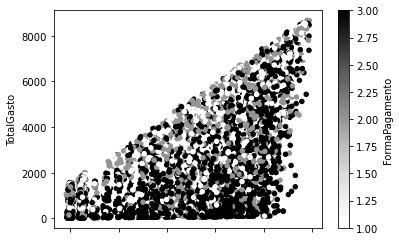

In [26]:
data_corr.plot.scatter(x='ValorMensal', y='TotalGasto', c='FormaPagamento')

In [27]:
data_corr.plot.scatter?